# Practice 4:  Implement Bayesian logistic regression and SVM for classification.

**Name:** Keshat Saini
**Roll Number:** RA2311026010916  
**Dataset:** Video Game Sales (Kaggle - Gregorut) https://www.kaggle.com/datasets/gregorut/videogamesales?utm_source=chatgpt.com

**Tool Used:** Google Colab  


	1.	Load the dataset
‎

	2.	Explore the data
‎

	3.	Preprocess the data
‎

	4.	Split the dataset
‎

	5.	Implement Bayesian Logistic Regression
‎

	6.	Implement SVM for classification
‎

	7.	Evaluate the models
‎

	8.	Perform prediction


#**Step 1**
loading the dataset and displaying first few lines

In [1]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving vgsales.csv to vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#**Step 2**
checking for missing values and missing value %age

In [2]:
print("Missing Values per Column:\n")
print(df.isnull().sum())
print("\nPercentage of Missing Values:\n")
print((df.isnull().mean() * 100).round(2))

Missing Values per Column:

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Percentage of Missing Values:

Rank            0.00
Name            0.00
Platform        0.00
Year            1.63
Genre           0.00
Publisher       0.35
NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.00
dtype: float64


#**Step 3**
preprocessing and data cleannig

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = df.copy()
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(0)

cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna("Unknown")
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
#High sales (>= 1M units) = 1, Low sales = 0
data["Global_Sales_High"] = (data["Global_Sales"] >= 1.0).astype(int)
X = data.drop(columns=["Name", "Global_Sales", "Global_Sales_High"])
y = data["Global_Sales_High"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessed")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Class distribution:\n", y.value_counts())
print(df.isnull().sum())

✅ Preprocessing complete
Shape of X: (16598, 10)
Shape of y: (16598,)
Class distribution:
 Global_Sales_High
0    15808
1      790
Name: count, dtype: int64
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Hit             0
dtype: int64


#**Step 4**
split dataset to train(80%) and test(20%)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (13278, 10)
Testing set size: (3320, 10)


#**Step 5**
Bayesian logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
bayes_log_reg = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
bayes_log_reg.fit(X_train, y_train)
print("Model coefficients:", bayes_log_reg.coef_)
print("Model intercept:", bayes_log_reg.intercept_)

Model coefficients: [[-0.40072218  0.1158546  -0.68165261  0.32499852  0.00555594  0.39564922
  -0.47830522 -0.25721426  0.01023676 -0.32012204]]
Model intercept: [312.49912427]


#**Step 6**
implementing svm

In [13]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
print("SVM model training completed.")

SVM model training completed.


#**Step 7**
evaluating model

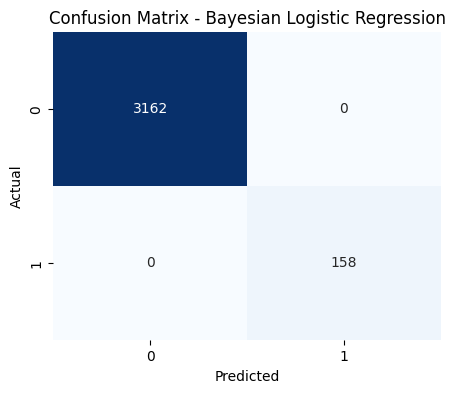

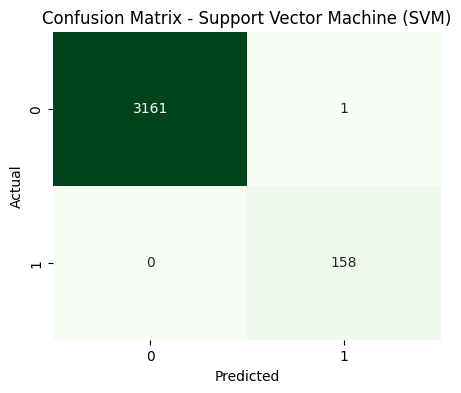

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
plt.figure(figsize=(5,4))
sns.heatmap(cm_bayes, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Bayesian Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#**Step 8**
prediction in a table

 **0 = low sales < 1 Million copies**

 **1 = high sales > 1 Million copies**

In [29]:
import pandas as pd

#Random 15 samples
sample_X = X_test.sample(n=15, random_state=42)
sample_y_true = y_test.loc[sample_X.index]
sample_game_names = df.loc[sample_X.index, "Name"]
#Predictions
sample_pred_bayes = bayes_log_reg.predict(sample_X)
sample_pred_svm = svm_model.predict(sample_X)
results_df = pd.DataFrame({
    "Game": sample_game_names.values,
    "Actual Value": sample_y_true.values,
    "Bayes Predicted": sample_pred_bayes,
    "SVM Predicted": sample_pred_svm
})
print("=== Sample Predictions (Random 15 Test Games) ===")
print(results_df.to_string(index=False))

=== Sample Predictions (Random 15 Test Games) ===
                                                           Game  Actual Value  Bayes Predicted  SVM Predicted
                                              Tales of Zestiria             0                0              0
                                     Famicom Mini: Star Soldier             0                0              0
                                          Moto Racer World Tour             0                0              0
                                               Zombie Hunters 2             0                0              0
                                                  Darksiders II             0                0              0
SD Gundam Sangokuden Brave Battle Warriors: Shin Mirisha Taisen             0                0              0
                     Phineas and Ferb: Across the 2nd Dimension             0                0              0
                                            Jampack Winter 2000       